In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('In Training:- ')
for col in train_df.columns:
    print(col)

In Training:- 
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [6]:
print('In Testing:- ')
for col in test_df.columns:
    print(col)

In Testing:- 
PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [7]:
print("Number Of Rows Of training dataset", len(train_df))

Number Of Rows Of training dataset 891


In [8]:
print("Number Of Columns Of training dataset", len(train_df.columns))

Number Of Columns Of training dataset 12


In [9]:
print("Number Of Rows Of Testing dataset", len(test_df))

Number Of Rows Of Testing dataset 418


In [10]:
print("Number Of Columns Of Testing dataset", len(test_df.columns))

Number Of Columns Of Testing dataset 11


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
dict={}
dict["Survived"]=train_df.Survived.unique()
dict["Pclass"]=train_df.Pclass.unique()
dict["Age"]=train_df.Age.unique()
dict["SibSp"]=train_df.SibSp.unique()
dict["Parch"]=train_df.Parch.unique()
dict["Embarked"]=train_df.Embarked.unique()
dict["Sex"]=train_df.Sex.unique()

In [16]:
dict


{'Survived': array([0, 1], dtype=int64),
 'Pclass': array([3, 1, 2], dtype=int64),
 'Age': array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
         8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
        49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
        16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
        71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
        51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
        45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
        60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
        70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ]),
 'SibSp': array([1, 0, 3, 4, 2, 5, 8], dtype=int64),
 'Parch': array([0, 1, 2, 5, 3, 4, 6], dtype=int64),
 'Embarked': array(['S', 'C', 'Q', nan], dtype=object),
 'Sex': array(['male', 'female'], dtype=obj

In [18]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [19]:
def title_search(name):
    name = re.search('(\w+)\.', name)
    #print("result:", name) 
    if name:
      #print("pattern found")
      title = name.group() 
      #print("title:", title)
    return title

In [20]:
train_df['Title'] = train_df['Name'].apply(title_search)

In [21]:
train_df['Title']

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

In [22]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [23]:
train_df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [24]:
survival={}
total={}

for title in zip(train_df["Title"],train_df["Survived"]):
    if title[0] in total.keys():
        total[title[0]]+=1
        survival[title[0]]+=title[1]
    else:
        total[title[0]]=1
        survival[title[0]]=title[1]
        
  
total

{'Mr.': 517,
 'Mrs.': 125,
 'Miss.': 182,
 'Master.': 40,
 'Don.': 1,
 'Rev.': 6,
 'Dr.': 7,
 'Mme.': 1,
 'Ms.': 1,
 'Major.': 2,
 'Lady.': 1,
 'Sir.': 1,
 'Mlle.': 2,
 'Col.': 2,
 'Capt.': 1,
 'Countess.': 1,
 'Jonkheer.': 1}

In [26]:
survival  

{'Mr.': 81,
 'Mrs.': 99,
 'Miss.': 127,
 'Master.': 23,
 'Don.': 0,
 'Rev.': 0,
 'Dr.': 3,
 'Mme.': 1,
 'Ms.': 1,
 'Major.': 1,
 'Lady.': 1,
 'Sir.': 1,
 'Mlle.': 2,
 'Col.': 1,
 'Capt.': 0,
 'Countess.': 1,
 'Jonkheer.': 0}

In [33]:
survivalrate={}

for rate in total.keys():
    survivalrate[rate]=survival[rate]/total[rate]
    
    
print(survivalrate)

{'Mr.': 0.15667311411992263, 'Mrs.': 0.792, 'Miss.': 0.6978021978021978, 'Master.': 0.575, 'Don.': 0.0, 'Rev.': 0.0, 'Dr.': 0.42857142857142855, 'Mme.': 1.0, 'Ms.': 1.0, 'Major.': 0.5, 'Lady.': 1.0, 'Sir.': 1.0, 'Mlle.': 1.0, 'Col.': 0.5, 'Capt.': 0.0, 'Countess.': 1.0, 'Jonkheer.': 0.0}


In [40]:
SR_df=pd.DataFrame()
SR_df["Title"]=list(survivalrate.keys())
SR_df["SurvivalRate"]=list(survivalrate.values())

In [41]:
SR_df

,Title,SurvivalRate
0,Mr.,0.156673
1,Mrs.,0.792000
2,Miss.,0.697802
3,Master.,0.575000
4,Don.,0.000000
5,Rev.,0.000000
6,Dr.,0.428571
7,Mme.,1.000000
8,Ms.,1.000000
9,Major.,0.500000


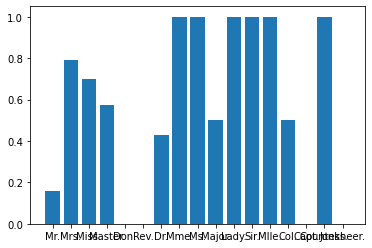

In [42]:
plt.bar(SR_df.Title, SR_df.SurvivalRate)
plt.show()

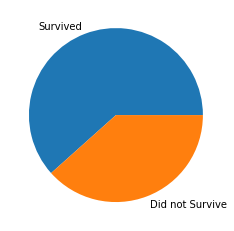

In [34]:
sr = train_df["Survived"].value_counts()
labels = 'Survived', 'Did not Survive'
plt.pie(sr, labels = labels)
plt.show()

In [36]:
MaleSurv = train_df[["Survived","Sex"]][train_df['Sex']=='male']

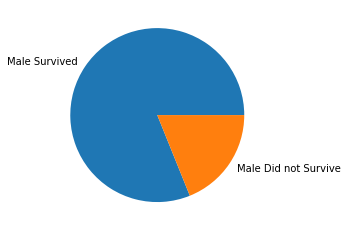

In [37]:
sr = MaleSurv["Survived"].value_counts()
labels = 'Male Survived', 'Male Did not Survive'
plt.pie(sr, labels = labels)
plt.show()

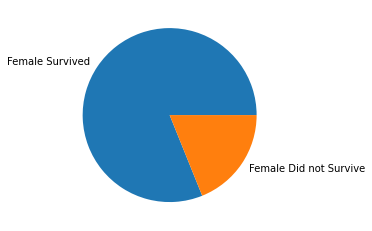

In [38]:
femaleSurv = train_df[["Survived","Sex"]][train_df['Sex']=='female']
sr = MaleSurv["Survived"].value_counts()
labels = 'Female Survived', 'Female Did not Survive'
plt.pie(sr, labels = labels)
plt.show()

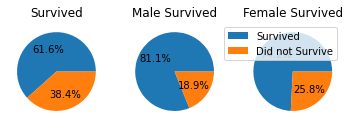

In [39]:
sr = train_df["Survived"].value_counts()
MaleSurv = train_df[["Survived","Sex"]][train_df['Sex']=='male']
srm = MaleSurv["Survived"].value_counts()
femaleSurv = train_df[["Survived","Sex"]][train_df['Sex']=='female']
srf = femaleSurv["Survived"].value_counts()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.pie(sr,autopct='%1.1f%%')
ax1.set_title('Survived')
ax2.pie(srm, autopct='%1.1f%%')
ax2.set_title('Male Survived')
ax3.pie(srf ,autopct='%1.1f%%')
ax3.set_title('Female Survived')
ax3.legend(loc='best', labels = ['Survived', 'Did not Survive'])

plt.show()

In [56]:
train_df.drop('PassengerId',axis=1,inplace=True)
train_df.drop('Ticket',axis=1,inplace=True)



In [57]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.


In [58]:
train_df.drop('Name',axis=1,inplace=True)

In [59]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.


In [60]:
train_df.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.000000
dtype: float64

In [61]:
train_df.drop('Cabin',axis=1,inplace=True)

In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [63]:
train_df.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
Title        0.000000
dtype: float64

In [64]:
modeEmb=train_df['Embarked'].mode()
modeEmb

0    S
dtype: object

In [65]:
train_df['Embarked'].fillna('S', inplace = True)

In [66]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [67]:
agemean=train_df['Age'].mean()
agemean


29.69911764705882

In [68]:
train_df['Age'].fillna(agemean, inplace = True)

In [69]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [70]:
train_df['Family_members'] = train_df['SibSp'] + train_df['Parch']

In [71]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.0,1,0,7.2500,S,Mr.,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,1
2,1,3,female,26.0,0,0,7.9250,S,Miss.,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,1
4,0,3,male,35.0,0,0,8.0500,S,Mr.,0


In [72]:
train_df.drop('SibSp',axis=1,inplace=True)
train_df.drop('Parch',axis=1,inplace=True)

In [73]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members
0,0,3,male,22.0,7.2500,S,Mr.,1
1,1,1,female,38.0,71.2833,C,Mrs.,1
2,1,3,female,26.0,7.9250,S,Miss.,0
3,1,1,female,35.0,53.1000,S,Mrs.,1
4,0,3,male,35.0,8.0500,S,Mr.,0


In [77]:
normal = train_df.copy()
normal.drop('Embarked',axis=1,inplace=True)
normal.drop('Pclass',axis=1,inplace=True)
normal.drop('Survived',axis=1,inplace=True)
normal.drop('Sex',axis=1,inplace=True)
normal.drop('Title',axis=1,inplace=True)


In [78]:
df_min_max_scaled = normal.copy()
  

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)

          Age      Fare  Family_members  Pclass_1  Pclass_2  Pclass_3  \
0    0.271174  0.014151             0.1       0.0       0.0       1.0   
1    0.472229  0.139136             0.1       1.0       0.0       0.0   
2    0.321438  0.015469             0.0       0.0       0.0       1.0   
3    0.434531  0.103644             0.1       1.0       0.0       0.0   
4    0.434531  0.015713             0.0       0.0       0.0       1.0   
..        ...       ...             ...       ...       ...       ...   
886  0.334004  0.025374             0.0       0.0       1.0       0.0   
887  0.233476  0.058556             0.0       1.0       0.0       0.0   
888  0.367921  0.045771             0.3       0.0       0.0       1.0   
889  0.321438  0.058556             0.0       1.0       0.0       0.0   
890  0.396833  0.015127             0.0       0.0       0.0       1.0   

     Sex_female  Sex_male  Title_Capt.  Title_Col.  ...  Title_Mlle.  \
0           0.0       1.0          0.0         0.0 

In [79]:
categorical_columns = ['Pclass', 'Sex' , 'Title' , 'Embarked']

for column in categorical_columns:
    tempdf = pd.get_dummies(train_df[column], prefix=column)

    train_df = pd.merge(
        left=train_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )

    df = train_df.drop(columns=column)

print(df)

     Survived  Pclass     Sex        Age     Fare  Title  Family_members  \
0           0       3    male  22.000000   7.2500    Mr.               1   
1           1       1  female  38.000000  71.2833   Mrs.               1   
2           1       3  female  26.000000   7.9250  Miss.               0   
3           1       1  female  35.000000  53.1000   Mrs.               1   
4           0       3    male  35.000000   8.0500    Mr.               0   
..        ...     ...     ...        ...      ...    ...             ...   
886         0       2    male  27.000000  13.0000   Rev.               0   
887         1       1  female  19.000000  30.0000  Miss.               0   
888         0       3  female  29.699118  23.4500  Miss.               3   
889         1       1    male  26.000000  30.0000    Mr.               0   
890         0       3    male  32.000000   7.7500    Mr.               0   

     Pclass_1_x  Pclass_2_x  Pclass_3_x  ...  Title_Mlle._y  Title_Mme._y  \
0         